<a href="https://colab.research.google.com/github/shwetasharma05072003-crypto/quiz-/blob/main/ProjectofAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       TIME   CONTROL  CURCUMIN  LINALOOL  COMBINATION
0  0.000000 -0.006855  0.010472  0.006885     0.015510
1  0.120603 -0.002166  0.009142  0.009770     0.020491
2  0.241206  0.012443  0.009431 -0.003075     0.018906
3  0.361809  0.006485  0.021385  0.004339     0.019558
4  0.482412 -0.002929  0.010845  0.011064     0.011913
5  0.603015  0.003810  0.006660 -0.002134     0.020797
6  0.723618 -0.002023  0.015779  0.003873     0.016956
7  0.844221  0.010223  0.021072  0.006459     0.020631
8  0.964824 -0.007766  0.023072  0.012237     0.023347
9  1.085427  0.005320  0.011811  0.010093     0.015674


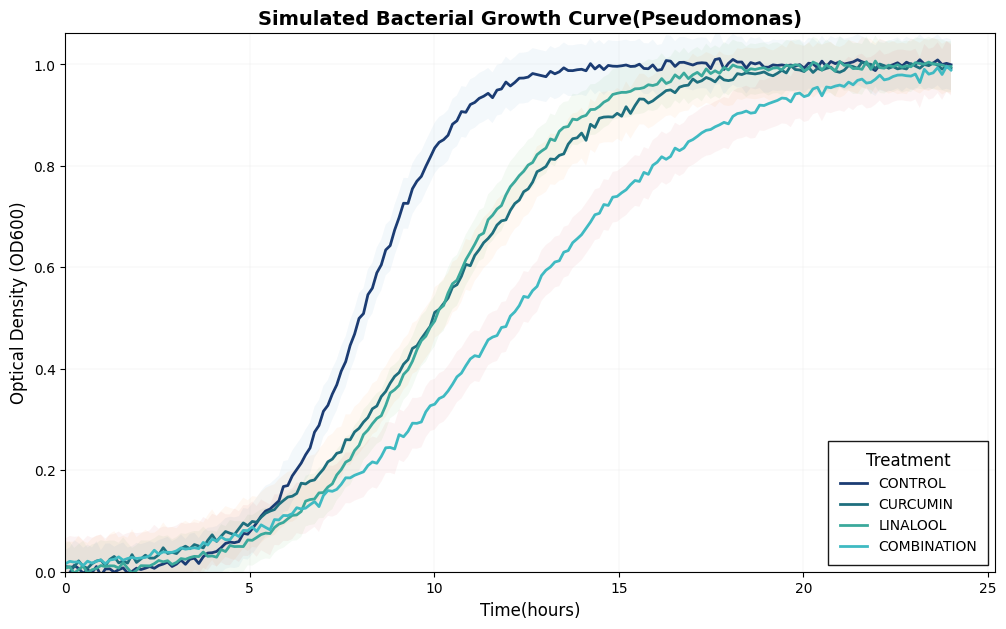

In [68]:
import numpy as np # importing numpy to perform exponential function
import pandas as pd # importing pandas to perform dataframe generation function
import matplotlib.pyplot as plt # importing matplotlib for plot visualization
import matplotlib.patheffects as pe # to create outline
time = np.linspace(0,24,200)# here we have time period between 0hr and 24 hr with 200 values
K= 1.0 # this the CARRYING CAPACITY....sets height of the S-curve
r= 0.8 # GROWTH RATE...larger r faster growth and smaller r slower growth
t0= 8 # It controls when lag phse end and log phase peaks if small growth shifts earlier
growth = K / (1+ np.exp(-r * (time - t0)))# this is logistic growth equation
# NOISE ADITIION
noise = np.random.normal(0,0.005,size= len(time)) # This generates random values where standard 3% is noise, and these random points are added per time points
# CURCUMIN TREATED SIMULATION.....r should decrease and t0 should increase
r_curcumin = 0.45 # reduced growth rate
t0_curcumin = 10 # lag phase is extended here
growth_curcumin = K / (1+ np.exp(-r_curcumin *(time - t0_curcumin)))
# NOISE ADDITION
noise_curcumin = np.random.normal(0, 0.005, size=len(time))
# LINALOOL TREATED SIMULATION.....reduce r and extend t0 but it is less inhibitory
r_linalool = 0.55
t0_linalool = 10
growth_linalool = K / (1 + np.exp( -r_linalool * (time - t0_linalool)))
# NOISE ADDITION
noise_linalool = np.random.normal(0,0.005, size=len(time))
# CURCUMIN +LINALOOL COMBINATION
r_combination = 0.35
t0_combination = 12
growth_combination = K / (1 + np.exp( -r_combination* ( time - t0_combination)))
# NOISE ADDITION
noise_combination = np.random.normal(0,0.005, size= len(time))
growth_noise_control = growth + noise
growth_noise_curcumin = growth_curcumin + noise_curcumin
growth_noise_linalool = growth_linalool + noise_linalool
growth_noise_combination = growth_combination + noise_combination
# Creating DATAFRAME
data = pd.DataFrame({"TIME": time,
                     "CONTROL": growth_noise_control,
                     "CURCUMIN": growth_noise_curcumin,
                     "LINALOOL": growth_noise_linalool,
                     "COMBINATION": growth_noise_combination})

table_data = data.head(10)
print(table_data)
#VISUALIZATION WITH MATPLOTLIB
plt.figure(figsize=(12,7))
plt.plot(time, growth_noise_control, label="CONTROL", linewidth=2,color="#1B3C73")
plt.plot(time, growth_noise_curcumin,label="CURCUMIN", linewidth=2,color="#1E6F7E" )
plt.plot(time, growth_noise_linalool,label ="LINALOOL",linewidth =2,color="#3BA99C")
plt.plot(time, growth_noise_combination,label="COMBINATION",linewidth=2,color="#3FBAC2")

plt.xlabel("Time(hours)", fontsize = 12)# this code labels the x axis
plt.ylabel("Optical Density (OD600)", fontsize=12)# this code labels the y axis
plt.title( "Simulated Bacterial Growth Curve(Pseudomonas)", fontsize=14,fontweight='bold',loc='center', color="black")
#This forces axes to start from zero as in matplotlib it adds 0.5 padding automatically
plt.xlim(left=0)
plt.ylim(bottom=0)
#The box that you see on lower right side is this
plt.legend(title="Treatment",
           title_fontsize=12,
           frameon=True,
           facecolor='white',
           edgecolor='black',
           framealpha=0.9,
           fancybox=False,# sharp,straight 90 degree corners
              borderpad=0.8,# spacing between text and border
           loc="lower right")
# the lines that you see behind plot is this and alpha controls the transparency
plt.grid(True, linestyle="-", linewidth=0.3, alpha=0.25)# linestyle control the style of grid lines and linewidth sets how thick the grid lines are.
#GENERATES SHADED ERRORS
plt.fill_between(time,
                 growth_noise_control -0.05,
                 growth_noise_control +0.05,
                 alpha=0.05)
plt.fill_between(time,
                growth_noise_curcumin -0.05,
                growth_noise_curcumin +0.05,
                alpha=0.05)
plt.fill_between(time,
                growth_noise_linalool -0.05,
                growth_noise_linalool +0.05,
                alpha=0.05)
plt.fill_between(time,
                 growth_noise_combination -0.05,
                 growth_noise_combination +0.05,
                 alpha=0.05) # alpha is used for transparency